# K-Means Clustering project 

## Clustering the countries based on socioeconomic and health factors

### Overview of dataset

The dataset contains the following columns
1. country :- Name of the country
2. child_mort :- Death of children under 5 years of age per 1000 live births
3. exports :- Exports of goods and services per capital. Given as %age of the GDP per capita
4. health :- Total health spending per capita. Given as %age of the GDP per capita
5. imports :- Imports of goods and services per capita. Given as %age of the GDP per capita
6. Income :- Net income per person
7. Inflation :- The measurement of the annual growth rate of the the total GDP
8. life_expec :- The average number of years a new born child would live if the current mortality pattens are to remain the same
9. total_fer :- The number of children that would be born to each woman if the age-fertility rates remain the same
10. gdpp :- The GDP per capita. Calculated as the total GDP divided by the total population


In [1]:
#importing the libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Reading the dataset

country_df = pd.read_csv('Country-data.csv')

In [3]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data analysis, cleaning and preprocessing

In [4]:
#checking datatypes and presence of null values 

country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#dropping the country column

df = country_df.drop(labels='country',inplace=False,axis=1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<AxesSubplot:>

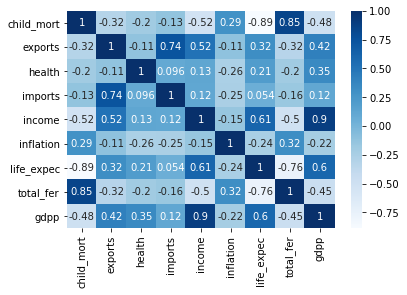

In [7]:
#checking for correlation 

sns.heatmap(df.corr(),cmap='Blues',annot=True)

## Applying PCA to dataset

In [8]:
#Standard scaling our dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [9]:
#Appling PCA

pca = PCA()
pca.fit(scaled_df)

PCA()

In [10]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

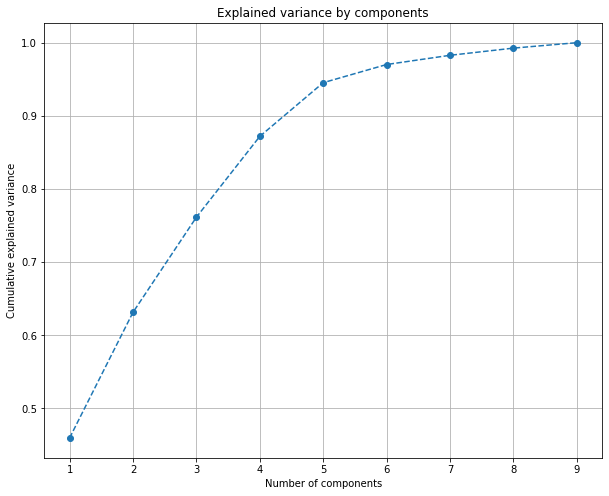

In [11]:
#Explained variance of each column in dataset after PCA

plt.figure(figsize=(10,8))
plt.plot(range(1,10),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()

In [12]:
pca = PCA(n_components=4)
pca.fit(scaled_df)

PCA(n_components=4)

In [13]:
pca_scores = pca.transform(scaled_df)

<AxesSubplot:>

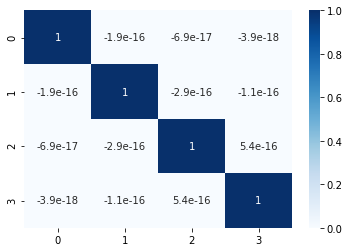

In [14]:
#Checking for correlation after applying PCA to dataset

corr = pd.DataFrame(pca_scores).corr()
sns.heatmap(corr,cmap='Blues', annot=True)

## Choosing number of clusters

To choose optimal number of clusters Elbow method and Silhoutte score are used.

### The Elbow method
In this method the WCSS (Within sum of clustered sum of squared errors) is calculated from 1 to 10 clusters. The point where increase in number of clusters does not give considerable decrease in inertia is considered as optimal number of clusters.

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=5)
    kmeans.fit(pca_scores)
    wcss.append(kmeans.inertia_)

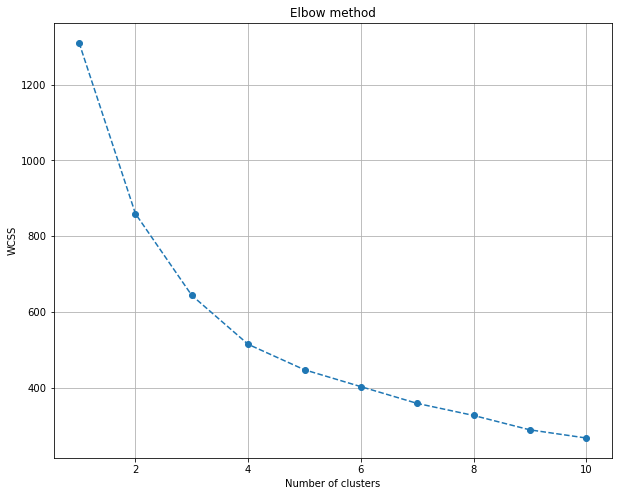

In [16]:
#the Elbow curve

plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.grid()

### The Silhoutte score
Silhoutte score is a metric used to calculate the goodness of clustering. It ranges from -1 to 1. 1 means clusters are well apart. 0 means distance between clusters are very less. -1 means clusters are assigned in wrong way. The number of clusters which has more silhoutte score is considered to be optimal number of clusters.

In [17]:
silhoutte_avg = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=5)
    cluster_labels=kmeans.fit_predict(pca_scores)
    silhoutte_avg.append(silhouette_score(pca_scores, cluster_labels))

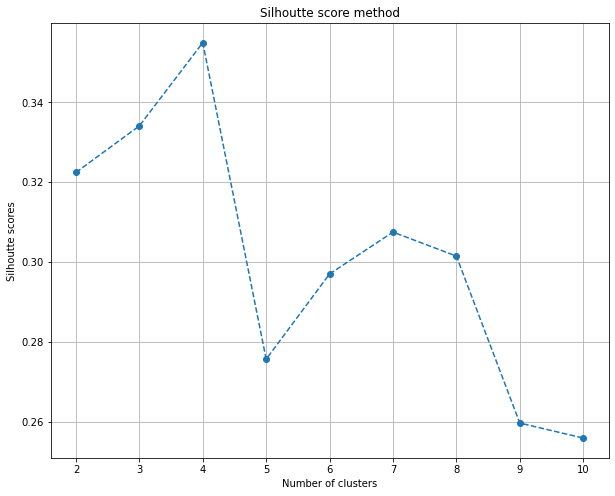

In [18]:
# Silhoutte scores graph

plt.figure(figsize=(10,8))
plt.plot(range(2,11), silhoutte_avg, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte scores')
plt.title('Silhoutte score method')
plt.grid()

## Applying KMeans Clustering to dataset

In [19]:
#Applying KMeans to our dataset

kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state=5)
kmeans.fit(pca_scores)

KMeans(n_clusters=4, random_state=5)

In [20]:
final_df = pd.DataFrame(pca_scores)
final_df.columns = ['PC1', 'PC2', 'PC3', 'PC4']
final_df['labels'] = kmeans.labels_
final_df['clusters'] = final_df['labels'].map({0:'first', 1:'second', 2:'third',3:'fourth'})
final_df.head()

,PC1,PC2,PC3,PC4,labels,clusters
0,-2.913025,0.095621,-0.718118,1.005255,2,third
1,0.429911,-0.588156,-0.333486,-1.161059,1,second
2,-0.285225,-0.455174,1.221505,-0.868115,1,second
3,-2.932423,1.695555,1.525044,0.839625,2,third
4,1.033576,0.136659,-0.225721,-0.847063,1,second


Text(0.5, 1.0, 'clusters')

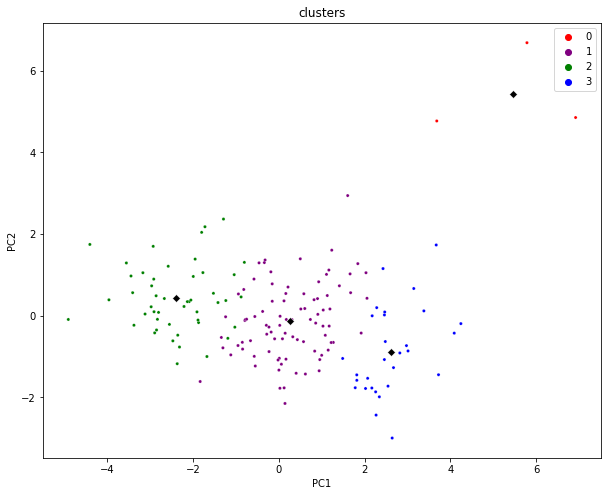

In [21]:
#Plotting clusters with centroids

plt.figure(figsize=(10,8))
colors = ['red', 'purple', 'green', 'blue']
sns.scatterplot(x= final_df['PC1'], y= final_df['PC2'] , hue= final_df['labels'], palette= colors, s=10)
sns.scatterplot(x= kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], color ='k', s=30, marker = 'D')
plt.title('clusters')

In [22]:
#Printing countries with their cluster groups

country_df['labels'] = kmeans.labels_
for i in range(4):
    countries = country_df[country_df['labels']==i]
    print('The number of countries in group ',(i+1),' is ',len(countries))
    print('They are: ')
    print(*countries['country'].values,sep=', ')
    print()

The number of countries in group  1  is  3
They are: 
Luxembourg, Malta, Singapore

The number of countries in group  2  is  87
They are: 
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Czech Republic, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Georgia, Grenada, Guatemala, Guyana, Hungary, India, Indonesia, Iran, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon, Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives, Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro, Morocco, Myanmar, Nepal, Oman, Panama, Paraguay, Peru, Philippines, Poland, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Slovak Republic, South Korea, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan, Thailand, Tonga, Tunisia, Turkey, Turkmenistan